In [2870]:
 # Employee Attrition Prediction and Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from scipy.stats import uniform, randint


In [2871]:
data = pd.read_csv(r'C:\Users\amrmh\Downloads\DEPI_PROJECT-main\DEPI_PROJECT-main\WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [2872]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel  

In [2873]:
print("\nDataset Description:")
print(data.describe().T)


Dataset Description:
                           count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome     

In [2874]:
data["Age"].min()

18

In [2875]:
data["Age"].max()

60

In [2876]:
sorted(data["Attrition"].unique())

['No', 'Yes']

In [2877]:
sorted(data["BusinessTravel"].unique())

['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']

In [2878]:
data["DailyRate"].min()

102

In [2879]:
data["DailyRate"].max()

1499

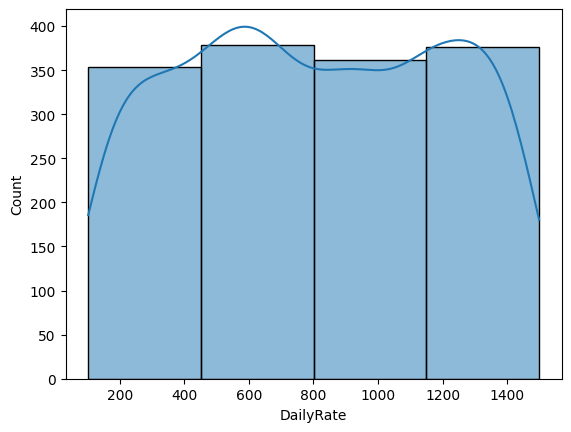

In [2880]:
sns.histplot(data["DailyRate"], bins=4,kde=True);

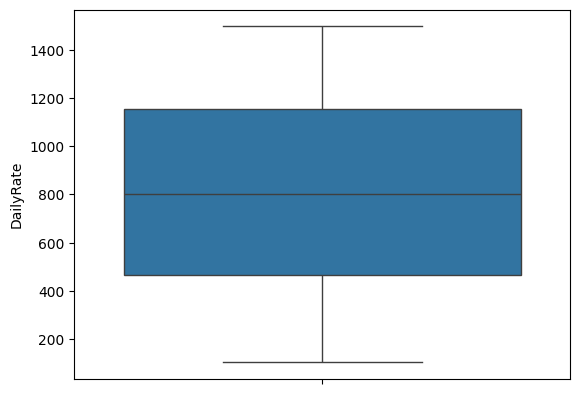

In [2881]:
sns.boxplot(y=data["DailyRate"]);

In [2882]:
bins = [0, 400, 600, 800, 1000, 1200, float('inf')]
labels = ['<= 400', '<= 600', '<= 800', '<= 1000', '<= 1200', '> 1200']
data['DailyRateCategory'] = pd.cut(data['DailyRate'], bins=bins, labels=labels, right=True)
data['DailyRateCategory'] = data['DailyRateCategory'].astype(str)

In [2883]:
sorted(data["DailyRateCategory"].unique())

['<= 1000', '<= 1200', '<= 400', '<= 600', '<= 800', '> 1200']

In [2884]:

sorted(data["Department"].unique())

['Human Resources', 'Research & Development', 'Sales']

In [2885]:

sorted(data["DistanceFromHome"].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

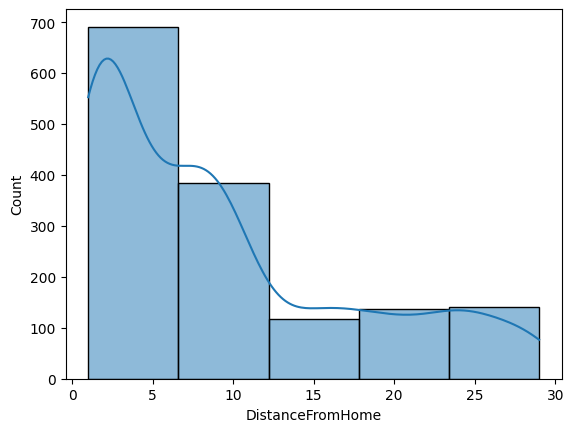

In [2886]:
sns.histplot(data["DistanceFromHome"], bins=5,kde=True);

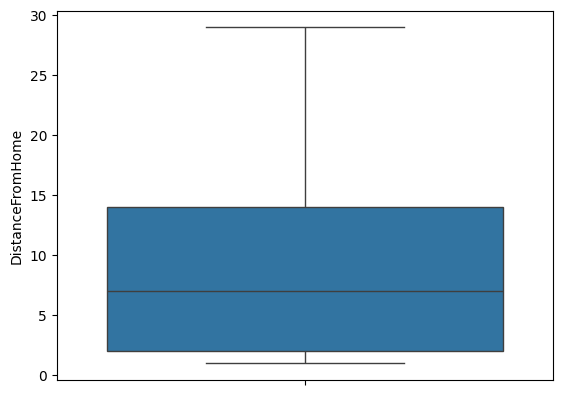

In [2887]:
sns.boxplot(y=data["DistanceFromHome"]);

In [2888]:
bins = [0, 5, 10, 15, 20, 25, float('inf')]
labels = ['<= 5', '<= 10', '<= 15', '<= 20', '<= 25', '> 25']
data['DistanceFromHomeCategory'] = pd.cut(data['DistanceFromHome'], bins=bins, labels=labels, right=True)
data['DistanceFromHomeCategory'] = data['DistanceFromHomeCategory'].astype(str)

In [2889]:
sorted(data["DistanceFromHomeCategory"].unique())

['<= 10', '<= 15', '<= 20', '<= 25', '<= 5', '> 25']

In [2890]:
data["Education"].min()

1

In [2891]:
data["Education"].max()

5

In [2892]:
sorted(data["EducationField"].unique())

['Human Resources',
 'Life Sciences',
 'Marketing',
 'Medical',
 'Other',
 'Technical Degree']

In [2893]:
data["EnvironmentSatisfaction"].min()

1

In [2894]:
data["EnvironmentSatisfaction"].max()

4

In [2895]:

sorted(data["Gender"].unique())

['Female', 'Male']

In [2896]:

data["HourlyRate"].min()

30

In [2897]:
data["HourlyRate"].max()

100

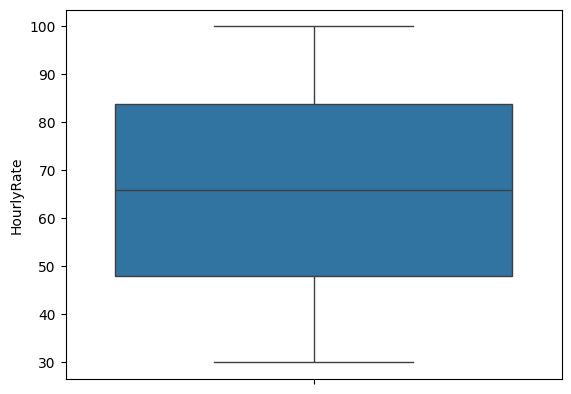

In [2898]:
sns.boxplot(y=data["HourlyRate"]);

In [2899]:

data["JobInvolvement"].min()

1

In [2900]:
data["JobInvolvement"].max()

4

In [2901]:

data["JobLevel"].min()

1

In [2902]:
data["JobLevel"].max()

5

In [2903]:
sorted(data["JobRole"].unique())

['Healthcare Representative',
 'Human Resources',
 'Laboratory Technician',
 'Manager',
 'Manufacturing Director',
 'Research Director',
 'Research Scientist',
 'Sales Executive',
 'Sales Representative']

In [2904]:

data["JobSatisfaction"].min()

1

In [2905]:
data["JobSatisfaction"].max()

4

In [2906]:

sorted(data["MaritalStatus"].unique())

['Divorced', 'Married', 'Single']

In [2907]:

data["MonthlyIncome"].min()

1009

In [2908]:
data["MonthlyIncome"].max()

19999

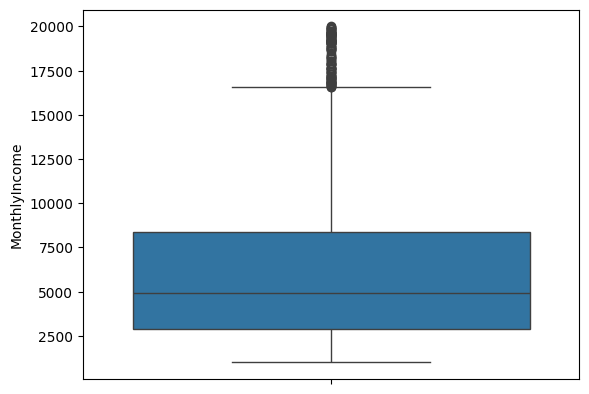

In [2909]:
sns.boxplot(y=data["MonthlyIncome"]);

In [2910]:
bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, float('inf')]
labels = ['<= 2500', '<= 5000', '<= 7500', '<= 10000', '<= 12500', '<= 15000', '<= 17500','> 17500']
data['MonthlyIncomeCategory'] = pd.cut(data['MonthlyIncome'], bins=bins, labels=labels, right=True)
data['MonthlyIncomeCategory'] = data['MonthlyIncomeCategory'].astype(str)

In [2911]:
sorted(data["MonthlyIncomeCategory"].unique())

['<= 10000',
 '<= 12500',
 '<= 15000',
 '<= 17500',
 '<= 2500',
 '<= 5000',
 '<= 7500',
 '> 17500']

In [2912]:

data["MonthlyRate"].min()

2094

In [2913]:
data["MonthlyRate"].max()

26999

In [2914]:

data["NumCompaniesWorked"].min()

0

In [2915]:
data["NumCompaniesWorked"].max()

9

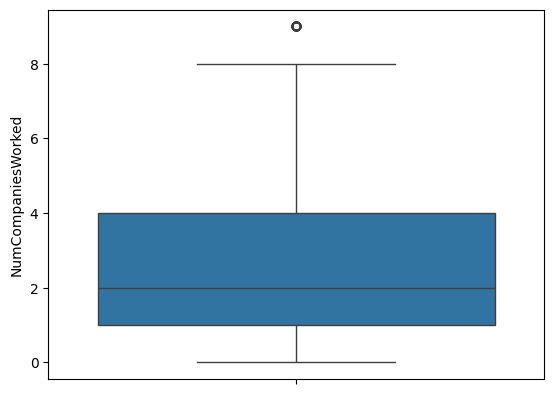

In [2916]:
sns.boxplot(y=data["NumCompaniesWorked"]);

In [2917]:
bins = [0, 2, 4, 6, 8, float('inf')]
labels = ['<= 2', '<= 4', '<= 6', '<= 8', '> 8']

# Using right=False to make bins left-inclusive
data['NumCompaniesWorkedCategory'] = pd.cut(data['NumCompaniesWorked'], bins=bins, labels=labels, right=False)

# Convert to string if necessary
data['NumCompaniesWorkedCategory'] = data['NumCompaniesWorkedCategory'].astype(str)


In [2918]:
sorted(data["NumCompaniesWorkedCategory"].unique())

['<= 2', '<= 4', '<= 6', '<= 8', '> 8']

In [2919]:
sorted(data["OverTime"].unique())

['No', 'Yes']

In [2920]:
data["PercentSalaryHike"].min()

11

In [2921]:
data["PercentSalaryHike"].max()

25

In [2922]:

data["PerformanceRating"].min()

3

In [2923]:

data["PerformanceRating"].max()

4

In [2924]:

data["RelationshipSatisfaction"].min()

1

In [2925]:
data["RelationshipSatisfaction"].max()

4

In [2926]:

data["StockOptionLevel"].min()

0

In [2927]:
data["StockOptionLevel"].max()

3

In [2928]:

data["TotalWorkingYears"].min()

0

In [2929]:
data["TotalWorkingYears"].max()

40

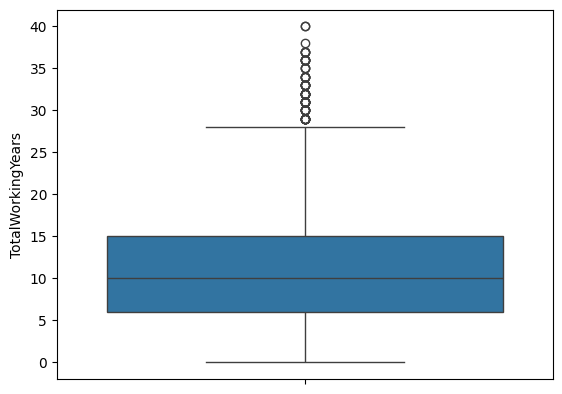

In [2930]:
sns.boxplot(y=data["TotalWorkingYears"]);

In [2931]:
bins = [0, 5, 10, 15, 20, 25, 30, float('inf')]
labels = ['<= 5', '<= 10', '<= 15', '<= 20', '<= 25','<= 30','> 30']

# Using right=False to make bins left-inclusive
data['TotalWorkingYearsCategory'] = pd.cut(data['TotalWorkingYears'], bins=bins, labels=labels, right=False)

# Convert to string if necessary
data['TotalWorkingYearsCategory'] = data['TotalWorkingYearsCategory'].astype(str)


In [2932]:
sorted(data["TotalWorkingYearsCategory"].unique())

['<= 10', '<= 15', '<= 20', '<= 25', '<= 30', '<= 5', '> 30']

In [2933]:

data["TrainingTimesLastYear"].min()

0

In [2934]:
data["TrainingTimesLastYear"].max()

6

In [2935]:

data["WorkLifeBalance"].min()

1

In [2936]:
data["WorkLifeBalance"].max()

C:\Users\amrmh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\displayhook.py:292: UserWarning:

Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.



4

In [2937]:

data["YearsAtCompany"].min()

0

In [2938]:
data["YearsAtCompany"].max()

40

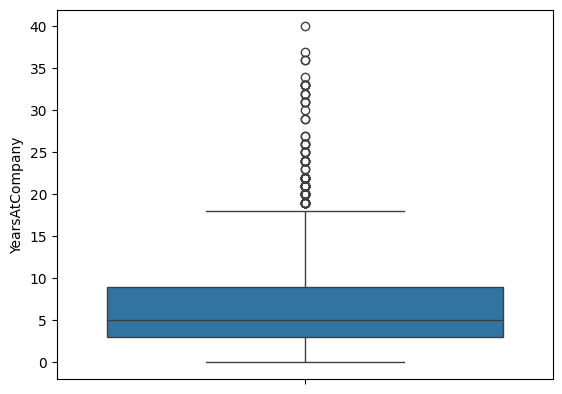

In [2939]:
sns.boxplot(y=data["YearsAtCompany"]);

In [2940]:
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['<= 5', '<= 10', '<= 15', '<= 20', '> 20']

# Using right=False to make bins left-inclusive
data['YearsAtCompanyCategory'] = pd.cut(data['YearsAtCompany'], bins=bins, labels=labels, right=False)

# Convert to string if necessary
data['YearsAtCompanyCategory'] = data['YearsAtCompanyCategory'].astype(str)

In [2941]:
sorted(data["YearsAtCompanyCategory"].unique())

['<= 10', '<= 15', '<= 20', '<= 5', '> 20']

In [2942]:

data["YearsInCurrentRole"].min()

0

In [2943]:
data["YearsInCurrentRole"].max()

18

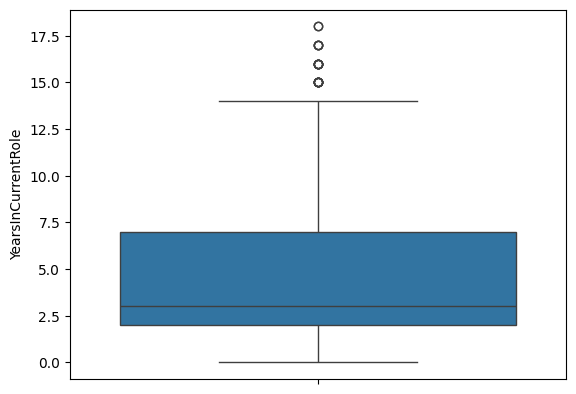

In [2944]:
sns.boxplot(y=data["YearsInCurrentRole"]);

In [2945]:
bins = [0, 3, 6, 9, 12, float('inf')]
labels = ['<= 3', '<= 6', '<= 9', '<= 12', '> 12']

# Using right=False to make bins left-inclusive
data['YearsInCurrentRoleCategory'] = pd.cut(data['YearsInCurrentRole'], bins=bins, labels=labels, right=False)

# Convert to string if necessary
data['YearsInCurrentRoleCategory'] = data['YearsInCurrentRoleCategory'].astype(str)

In [2946]:
sorted(data["YearsInCurrentRoleCategory"].unique())

['<= 12', '<= 3', '<= 6', '<= 9', '> 12']

In [2947]:

data["YearsSinceLastPromotion"].min()

0

In [2948]:
data["YearsSinceLastPromotion"].max()

15

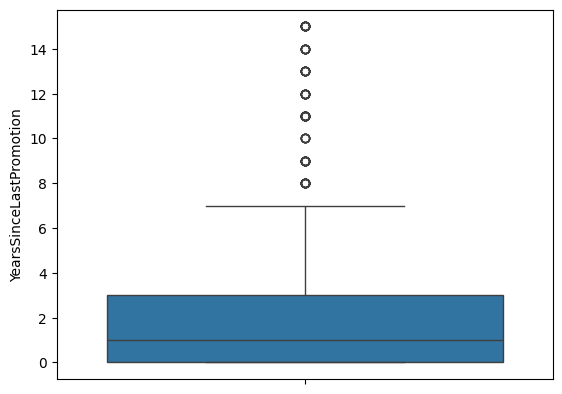

In [2949]:
sns.boxplot(y=data["YearsSinceLastPromotion"]);

In [2950]:
bins = [0, 2, 4, 6, 8, float('inf')]
labels = ['<= 2', '<= 4', '<= 6', '<= 8', '> 8']

# Using right=False to make bins left-inclusive
data['YearsSinceLastPromotionCategory'] = pd.cut(data['YearsSinceLastPromotion'], bins=bins, labels=labels, right=False)

# Convert to string if necessary
data['YearsSinceLastPromotionCategory'] = data['YearsSinceLastPromotionCategory'].astype(str)

In [2951]:
sorted(data["YearsSinceLastPromotionCategory"].unique())

['<= 2', '<= 4', '<= 6', '<= 8', '> 8']

In [2952]:

data["YearsWithCurrManager"].min()

0

In [2953]:
data["YearsWithCurrManager"].max()

17

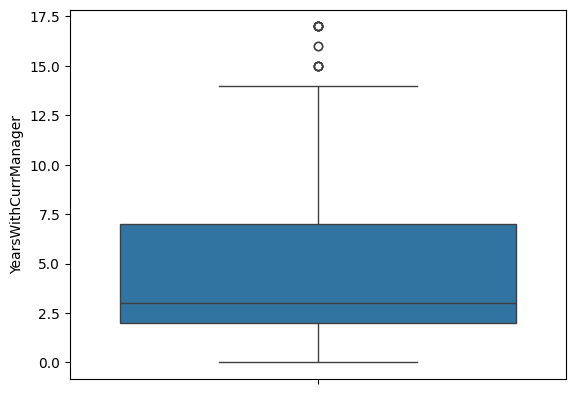

In [2954]:
sns.boxplot(y=data["YearsWithCurrManager"]);

In [2955]:
bins = [0, 3, 6, 9, 12, float('inf')]
labels = ['<= 3', '<= 6', '<= 9', '<= 12', '> 12']

# Using right=False to make bins left-inclusive
data['YearsWithCurrManagerCategory'] = pd.cut(data['YearsWithCurrManager'], bins=bins, labels=labels, right=False)

# Convert to string if necessary
data['YearsWithCurrManagerCategory'] = data['YearsWithCurrManagerCategory'].astype(str)

In [2956]:
sorted(data["YearsWithCurrManagerCategory"].unique())

['<= 12', '<= 3', '<= 6', '<= 9', '> 12']

In [2957]:
sorted(data["Attrition"].unique())

['No', 'Yes']

In [2958]:
fig = px.histogram(data, x="Attrition", color="Attrition",
                   title="Employee Attrition Count",
                   color_discrete_sequence=['salmon', 'skyblue'])
fig.show()

In [2959]:
num_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
            'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in num_cols:
    fig = px.box(data, x='Attrition', y=col, color='Attrition',
                 title=f"{col} vs Attrition",
                 color_discrete_sequence=['salmon', 'skyblue'])
    fig.show()

In [2960]:
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
            'JobRole', 'MaritalStatus', 'OverTime']

for col in cat_cols:
    fig = px.histogram(data, x=col, color='Attrition', barmode='group',
                       title=f"{col} by Attrition",
                       color_discrete_sequence=['salmon', 'skyblue'])
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.show()


In [2961]:
# Encode Attrition
df_corr = data.copy()
df_corr['Attrition'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})
corr = df_corr.corr(numeric_only=True).round(2)
fig = go.Figure(data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale='RdBu',
        zmin=-1, zmax=1,
        colorbar=dict(title="Correlation")
    ))

fig.update_layout(title='Correlation Heatmap')
fig.show()


In [2962]:
fig = px.scatter(data, x='TotalWorkingYears', y='MonthlyIncome',
                 color='Attrition',
                 title='Monthly Income vs Total Working Years by Attrition',
                 size='Age',
                 color_discrete_sequence=['red', 'skyblue'],
                 hover_data=['JobRole', 'JobLevel'])
fig.show()


In [2963]:
dept_attr = data.groupby(['Department', 'Attrition']).size().reset_index(name='Count')
fig = px.bar(dept_attr, x='Department', y='Count', color='Attrition',
             barmode='group',
             title='Attrition Count by Department',
             color_discrete_sequence=['skyblue', 'salmon'])
fig.show()


In [2964]:
fig = px.histogram(data, x="Age", color="Attrition", nbins=30,
                   marginal="box",
                   title="Age Distribution by Attrition",
                   color_discrete_sequence=['skyblue', 'salmon'])
fig.show()


In [2965]:
fig = px.histogram(data, x="JobRole", color="Gender", barmode='group',
                   facet_col="Attrition",
                   title="Job Role Distribution by Gender and Attrition",
                   color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [2966]:
df=data.copy()
color_map = {'Yes': 'lightcoral', 'No': 'skyblue'}
df['AttritionColor'] = df['Attrition'].map(color_map)
fig = px.sunburst(df, path=['Department', 'JobRole', 'Attrition'],
                  values=None,
                  color='AttritionColor',
                  title='Attrition Breakdown by Department and Job Role')
fig.show()

In [2967]:
#Categorical Columns
cat = data.select_dtypes(['object']).columns
#Numerical Columns
num = data.select_dtypes(['number']).columns


In [2968]:
data = data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber',"DailyRate","DistanceFromHome","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike"
                  ,"TotalWorkingYears","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"], axis =1)


In [2969]:
data["Attrition"] = data["Attrition"].map({"Yes": 1, "No":0})


In [2970]:
cat= data.drop('Attrition',axis=1).select_dtypes(['object']).columns
cat

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'DailyRateCategory',
       'DistanceFromHomeCategory', 'MonthlyIncomeCategory',
       'NumCompaniesWorkedCategory', 'TotalWorkingYearsCategory',
       'YearsAtCompanyCategory', 'YearsInCurrentRoleCategory',
       'YearsSinceLastPromotionCategory', 'YearsWithCurrManagerCategory'],
      dtype='object')

In [2971]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat:
    data[col] = label_encoder.fit_transform(data[col])

In [2972]:
X=data.drop(columns='Attrition')
y=data['Attrition']

In [2973]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

In [2974]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [2975]:
from xgboost import XGBClassifier
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]) * 1.5  # Increase this factor

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

C:\Users\amrmh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning:

[20:22:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.7959183673469388
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       247
           1       0.39      0.47      0.42        47

    accuracy                           0.80       294
   macro avg       0.64      0.66      0.65       294
weighted avg       0.81      0.80      0.80       294

Confusion Matrix:
 [[212  35]
 [ 25  22]]


In [2976]:
import pickle
file_name = "HR.sav"
pickle.dump(xgb_model,open(file_name,"wb"))

In [2977]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              1470 non-null   int64
 1   Attrition                        1470 non-null   int64
 2   BusinessTravel                   1470 non-null   int32
 3   Department                       1470 non-null   int32
 4   Education                        1470 non-null   int64
 5   EducationField                   1470 non-null   int32
 6   EnvironmentSatisfaction          1470 non-null   int64
 7   Gender                           1470 non-null   int32
 8   HourlyRate                       1470 non-null   int64
 9   JobInvolvement                   1470 non-null   int64
 10  JobLevel                         1470 non-null   int64
 11  JobRole                          1470 non-null   int32
 12  JobSatisfaction                  1470 non-null  

In [2978]:
sorted(data["Attrition"].unique())

[0, 1]

In [2979]:
sorted(data["BusinessTravel"].unique())

[0, 1, 2]

In [2980]:
sorted(data["Department"].unique())

[0, 1, 2]

In [2981]:
sorted(data["DistanceFromHomeCategory"].unique())

[0, 1, 2, 3, 4, 5]

In [2982]:
sorted(data["Education"].unique())

[1, 2, 3, 4, 5]

In [2983]:
sorted(data["EducationField"].unique())

[0, 1, 2, 3, 4, 5]

In [2984]:
sorted(data["Gender"].unique())

[0, 1]

In [2985]:
sorted(data["JobRole"].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [2986]:
sorted(data["MaritalStatus"].unique())

[0, 1, 2]

In [2987]:
sorted(data["OverTime"].unique())

[0, 1]

In [2988]:
sorted(data["DailyRateCategory"].unique())

[0, 1, 2, 3, 4, 5]

In [2989]:
sorted(data["MonthlyIncomeCategory"].unique())

[0, 1, 2, 3, 4, 5, 6, 7]

In [2990]:
sorted(data["NumCompaniesWorkedCategory"].unique())

[0, 1, 2, 3, 4]

In [2991]:
sorted(data["TotalWorkingYearsCategory"].unique())

[0, 1, 2, 3, 4, 5, 6]

In [2992]:
sorted(data["YearsAtCompanyCategory"].unique())

[0, 1, 2, 3, 4]

In [2993]:
sorted(data["YearsInCurrentRoleCategory"].unique())

[0, 1, 2, 3, 4]

In [2994]:
sorted(data["YearsSinceLastPromotionCategory"].unique())

[0, 1, 2, 3, 4]

In [2995]:
sorted(data["YearsWithCurrManagerCategory"].unique())

[0, 1, 2, 3, 4]

In [2996]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              1470 non-null   int64
 1   Attrition                        1470 non-null   int64
 2   BusinessTravel                   1470 non-null   int32
 3   Department                       1470 non-null   int32
 4   Education                        1470 non-null   int64
 5   EducationField                   1470 non-null   int32
 6   EnvironmentSatisfaction          1470 non-null   int64
 7   Gender                           1470 non-null   int32
 8   HourlyRate                       1470 non-null   int64
 9   JobInvolvement                   1470 non-null   int64
 10  JobLevel                         1470 non-null   int64
 11  JobRole                          1470 non-null   int32
 12  JobSatisfaction                  1470 non-null  

In [2997]:
sorted(data["Attrition"].unique())

[0, 1]